<a href="https://colab.research.google.com/github/billyaja/Heavy-Indicators-on-Traffic/blob/main/Finding_Heavy_Traffic_Indicators_on_I_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Westbound traffic

We're about to analyse a dataset about the westbounding traffic on I-94 Interstate highway. John Hogue made the dataset available and can be downloaded from [UCl Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). 

The goal of this analysis is to find a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find that traffic is usually heavier in the summer or when it snows.

In [ ]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


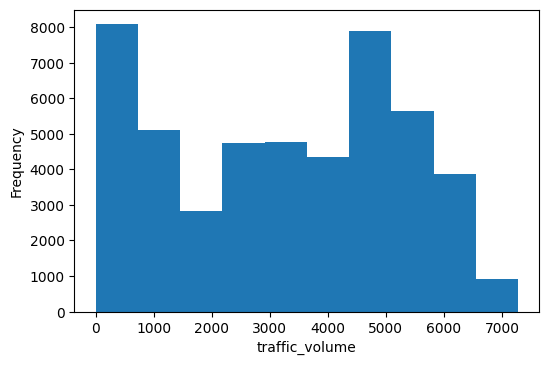

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
traffic['traffic_volume'].plot.hist()
plt.xlabel('traffic_volume')
plt.show()

In [ ]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Time Indicator

Here are some insights we get from the histogram and statistical summary:
- The general traffic volume is in the range of 0-5000.
- The most frequent traffic volume is in the range of 0-500
- The lowest traffic volume is in the range of 6600 - 7000
- If data are sorted by traffic, 50% of all the data has traffic that is lower than 3380
- 75% of all data has a lower traffic volume than 4933 

**Is traffic volume affected by the time of day?** 

In [ ]:
traffic['datetime'] = pd.to_datetime(traffic['date_time'])
traffic.drop(columns=['date_time'], inplace=True)

In [ ]:
day = traffic[(traffic['datetime'].dt.hour >= 7) & (traffic['datetime'].dt.hour <= 19) ]  
night = traffic[(traffic['datetime'].dt.hour > 19) | (traffic['datetime'].dt.hour < 7) ]

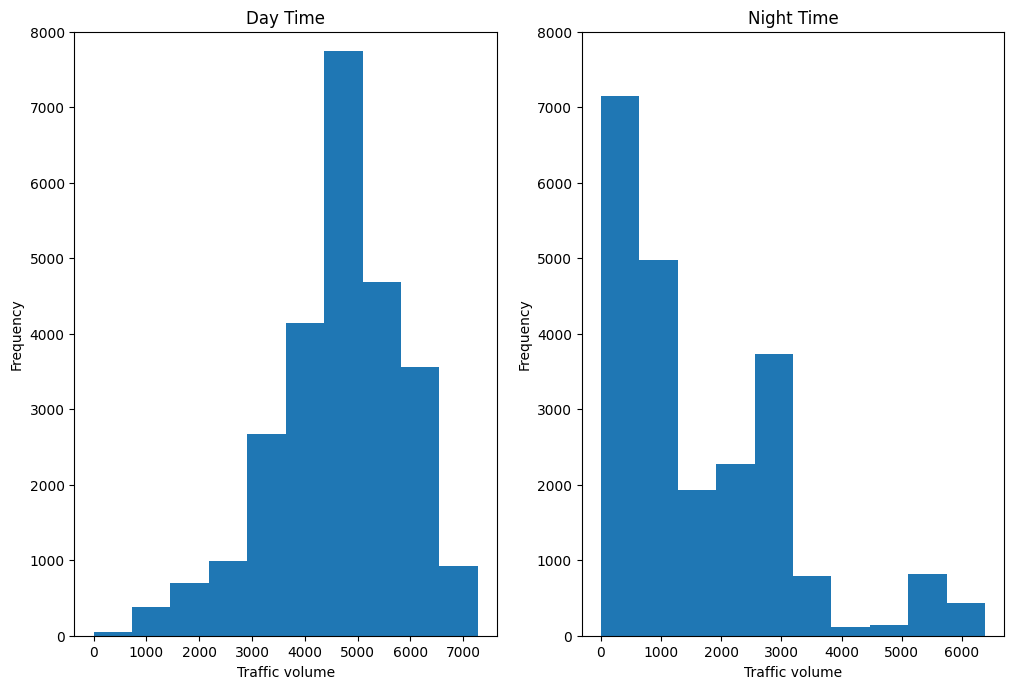

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Day Time')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Night Time')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.show()

In [ ]:
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [ ]:
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

Analysis: 
- The daytime histogram tends to be normal, with median and mean traffic volumes ranging from 4649 to 4736. 

- During the night hours, the histogram is right skewed, with 50% of all the data having a traffic volume lower than 1056.

Result:

- Based on the analysis above, traffic volume at night is lower than in the daytime.

- If traffic at night time is _lower_ than the day time and our goal is to find indicators that could cause heavy traffic then we don't need the night time data for further analysis

**Is there any pattern of traffic volume based on the months?**

In [ ]:
day['month'] = day['datetime'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-14-6f62f7611559>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

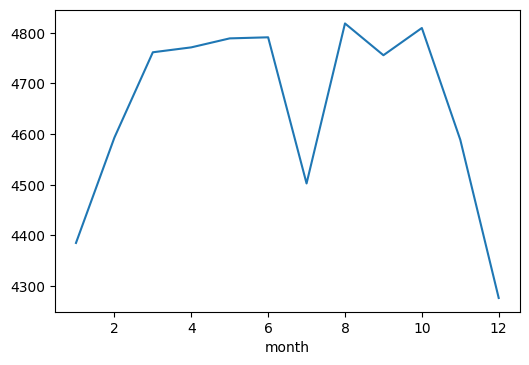

In [ ]:
by_month['traffic_volume'].plot.line()
plt.show()

Analysis: 
- The lowest traffic volume is in December
- The highest traffic volume is in August
- In the line plot, there are some interesting findings. For example, a significant decrease in traffic volume from June to July, and an increase in traffic volume from July to August. What happened in July? Since July is a holiday month, as well as December and January, it may be that people that commute to work or school contribute to traffic volume. 

We'll try to do further analysis on that

**What about the weekdays?**

In [ ]:
day['dayofweek'] = day['datetime'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-19-8f4d49840572>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

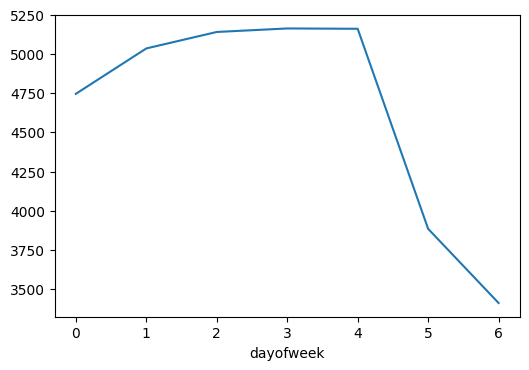

In [ ]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Analysis: 
- Traffic volume is high from 0 (Monday) to 4 (Friday) and decreases from 5 (Saturday) to 6 (Sunday). In other words, there is a very significant difference between business day and weekend traffic volume.

**What about the hour?**

In [ ]:
day['hour'] = day['datetime'].dt.hour
business_days = day.copy()[day['dayofweek'] <=4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-29-8842589529af>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



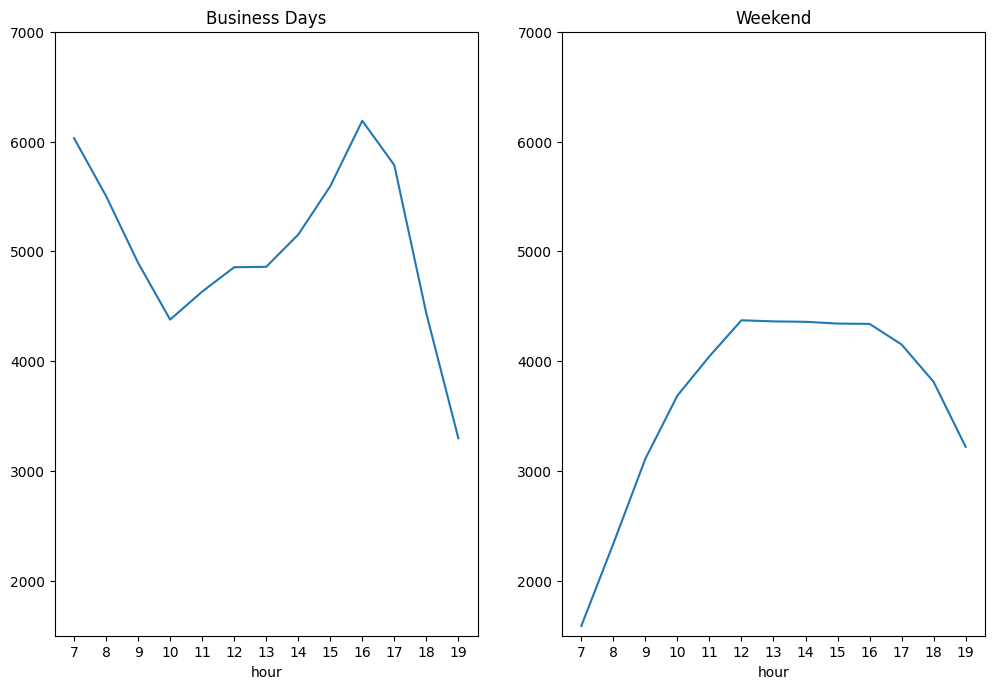

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days')
plt.ylim([1500, 7000])
plt.xticks(range(7, 20))

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.ylim([1500, 7000])
plt.xticks(range(7, 20))
plt.show()

Analysis:
- By average, traffic volume on business days is higher than weekend.
- On business days, 7 a.m. and 16 (4 p.m.) have the highest traffic volume. It means that these hours are the rush hours.

Result: 
- Looking at traffic volume by month, by day, and by hour, rush hours are the most indicative of heavier traffic volumes.

#### Weather Indicator

Let's find the correlation between traffic volume and `temp`, `rain_1h`, `snow_1h`, `clouds_all`

In [ ]:
day.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.118084
rain_1h       0.004020
snow_1h       0.003768
clouds_all   -0.033410
Name: traffic_volume, dtype: float64

`temp` has the highest correlation coefficient with traffic volume than the others

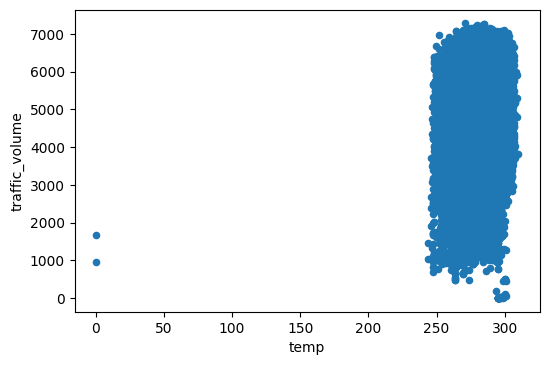

In [ ]:
day.plot.scatter('temp', 'traffic_volume')
plt.show()

Analysis: 
- Looking at the scatter plot, temp and traffic are not reliably correlated. The correlation value between temp and traffic volume is high because of the outliers (0), as we can see from the plot above.     
- Rain_1h, snow_1h, and clouds_all show weak correlations with traffic volume.

Result:
- These weather indicators are not reliable enough to indicate heavy traffic.

##### Weather Types
Let's try go deeper into the weather types

In [ ]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

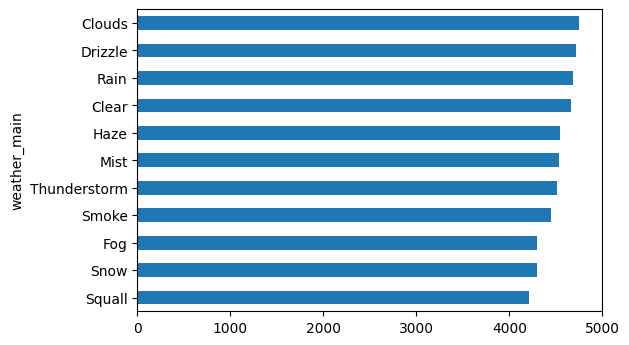

In [ ]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.xlim([0, 5000])
plt.show()

Analysis: 
- There's no traffic volume more than 5000 cars. 
- There is no weather type that shows significant different traffic volume among the others.

##### Weather Description

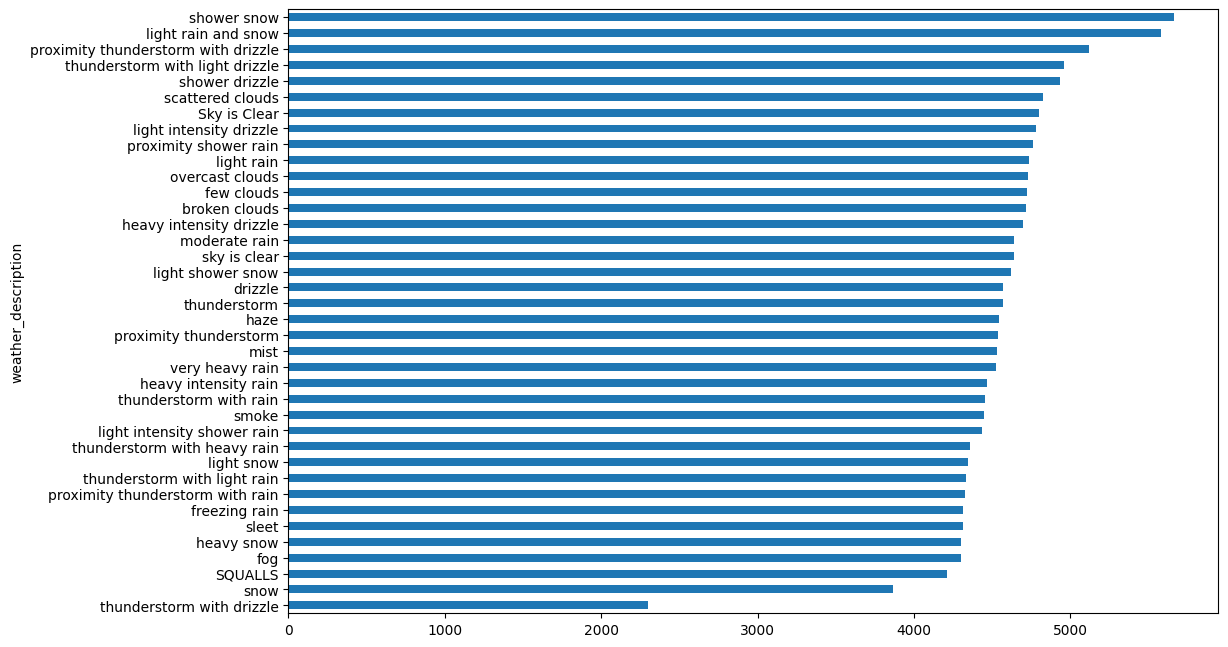

In [ ]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(12,8))
plt.show()

Analysis: 
- A thunderstorm with drizzle, shower snow, light rain and snow, or a proximity thunderstorm shows more than 5000 vehicles. It is evident that the weather can indicate heavy traffic.

#### Conclusion
- Heavy traffic tends to happen during the daytime
- The highest traffic volume is from March to June and August to October
- Traffic volume is higher during business days at 7 a.m. and 4 p.m.
- Heavy traffic is associated with extreme weather conditions, such as showers of snow, light rain and snow, and thunderstorms with drizzle.